In [2]:
import numpy as np
from scipy import integrate
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

# Simulating a Driven Damped Pendulum
We'll be using dimensionless variables so that the natural frequency is equal to 1.

I'll be using the parameters as defined below
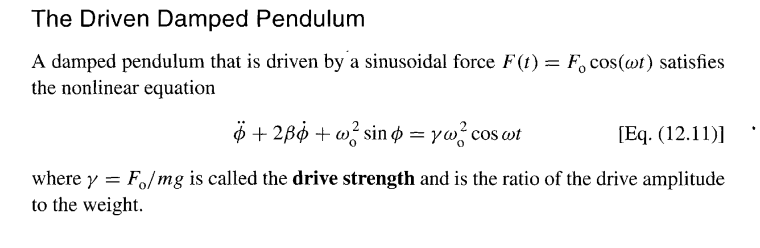

$
\frac{d\phi}{d\\t} = \dot{\phi}
\\[5mm]
\frac{d\dot{\phi}}{d\\t} = -\omega_0^2 sin(\phi) - 2\beta\dot{\phi} + \gamma \omega_0^2 cos(\omega t)
$

In [3]:
# 
def eom_dpp(t,state,beta,gamma,omega0,omega):
    '''
    Function returning derivatives of the dependent quantities theta and omega for a driven damped pendulum
    state: Array of size 2 describing state of the system
        state[0]: phi, the pendulum angle from the vertical
        state[1]: phi_dot, angular velocity    
    beta: damping parameter
    gamma: drive strength
    omega0: Resonant frequency
    omega: drive frequency
    '''

    phi = state[0]
    phi_dot = state[1]

    d_phi_dt = phi_dot
    d_phi_dot_dt = -2*beta*phi_dot - omega0**2*np.sin(phi) + gamma*omega0**2*np.cos(omega*t)
    return (d_phi_dt,d_phi_dot_dt)

# Bifurcation Map

In [4]:
t_start = 0
t_end = 1000
t_eval = np.linspace(t_start,t_end,1001)


gamma_list = np.linspace(1.06,1.087,1000)
length_gamma_list = len(gamma_list)
length_bifurcation_pts = len(t_eval[500:])

phi0 = -np.pi/2        # Initial theta
phi_dot0 = 0    # Initial angular velocity
state0 = np.array([phi0,phi_dot0])
omega = 2*np.pi     # Driving frequency
omega0 =  1.5*omega      # Natural frequency
beta = omega0/4         # Damping parameter



#initialize gamma_matrix and birfurcation pts
gamma_matrix = np.ones(shape=(length_gamma_list,length_bifurcation_pts))
bifurcation_pts = np.zeros(shape=(length_gamma_list,length_bifurcation_pts))

for index in np.arange(length_gamma_list):
    gamma_matrix[index] = gamma_list[index]*gamma_matrix[index]

for index in np.arange(length_gamma_list):
    sol = integrate.solve_ivp(eom_dpp,t_span = (t_start,t_end), y0=state0, 
                          t_eval=t_eval,atol=1e-16, rtol=1e-16,args=(beta,gamma_list[index],omega0,omega))

    phi = sol.y[0]
    
    bifurcation_pts[index] = phi[500:]

# With Bifurcation points solved for, save the values to a file so we don't have to calculate them again
np.save('bifurcation_pts',bifurcation_pts)
np.save('bifurcation_gammas',gamma_matrix)



c:\Users\hrodrigu\git\DPP_Chaos\DPP_Chaos\.venv\Lib\site-packages\scipy\integrate\_ivp\ivp.py:621: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)


In [5]:
#Load bifurcation and gamma values
bifurcation_pts = np.load('bifurcation_pts.npy')
gamma_matrix = np.load('bifurcation_gammas.npy')

Text(0.5, 1.0, 'Bifurcation Map')

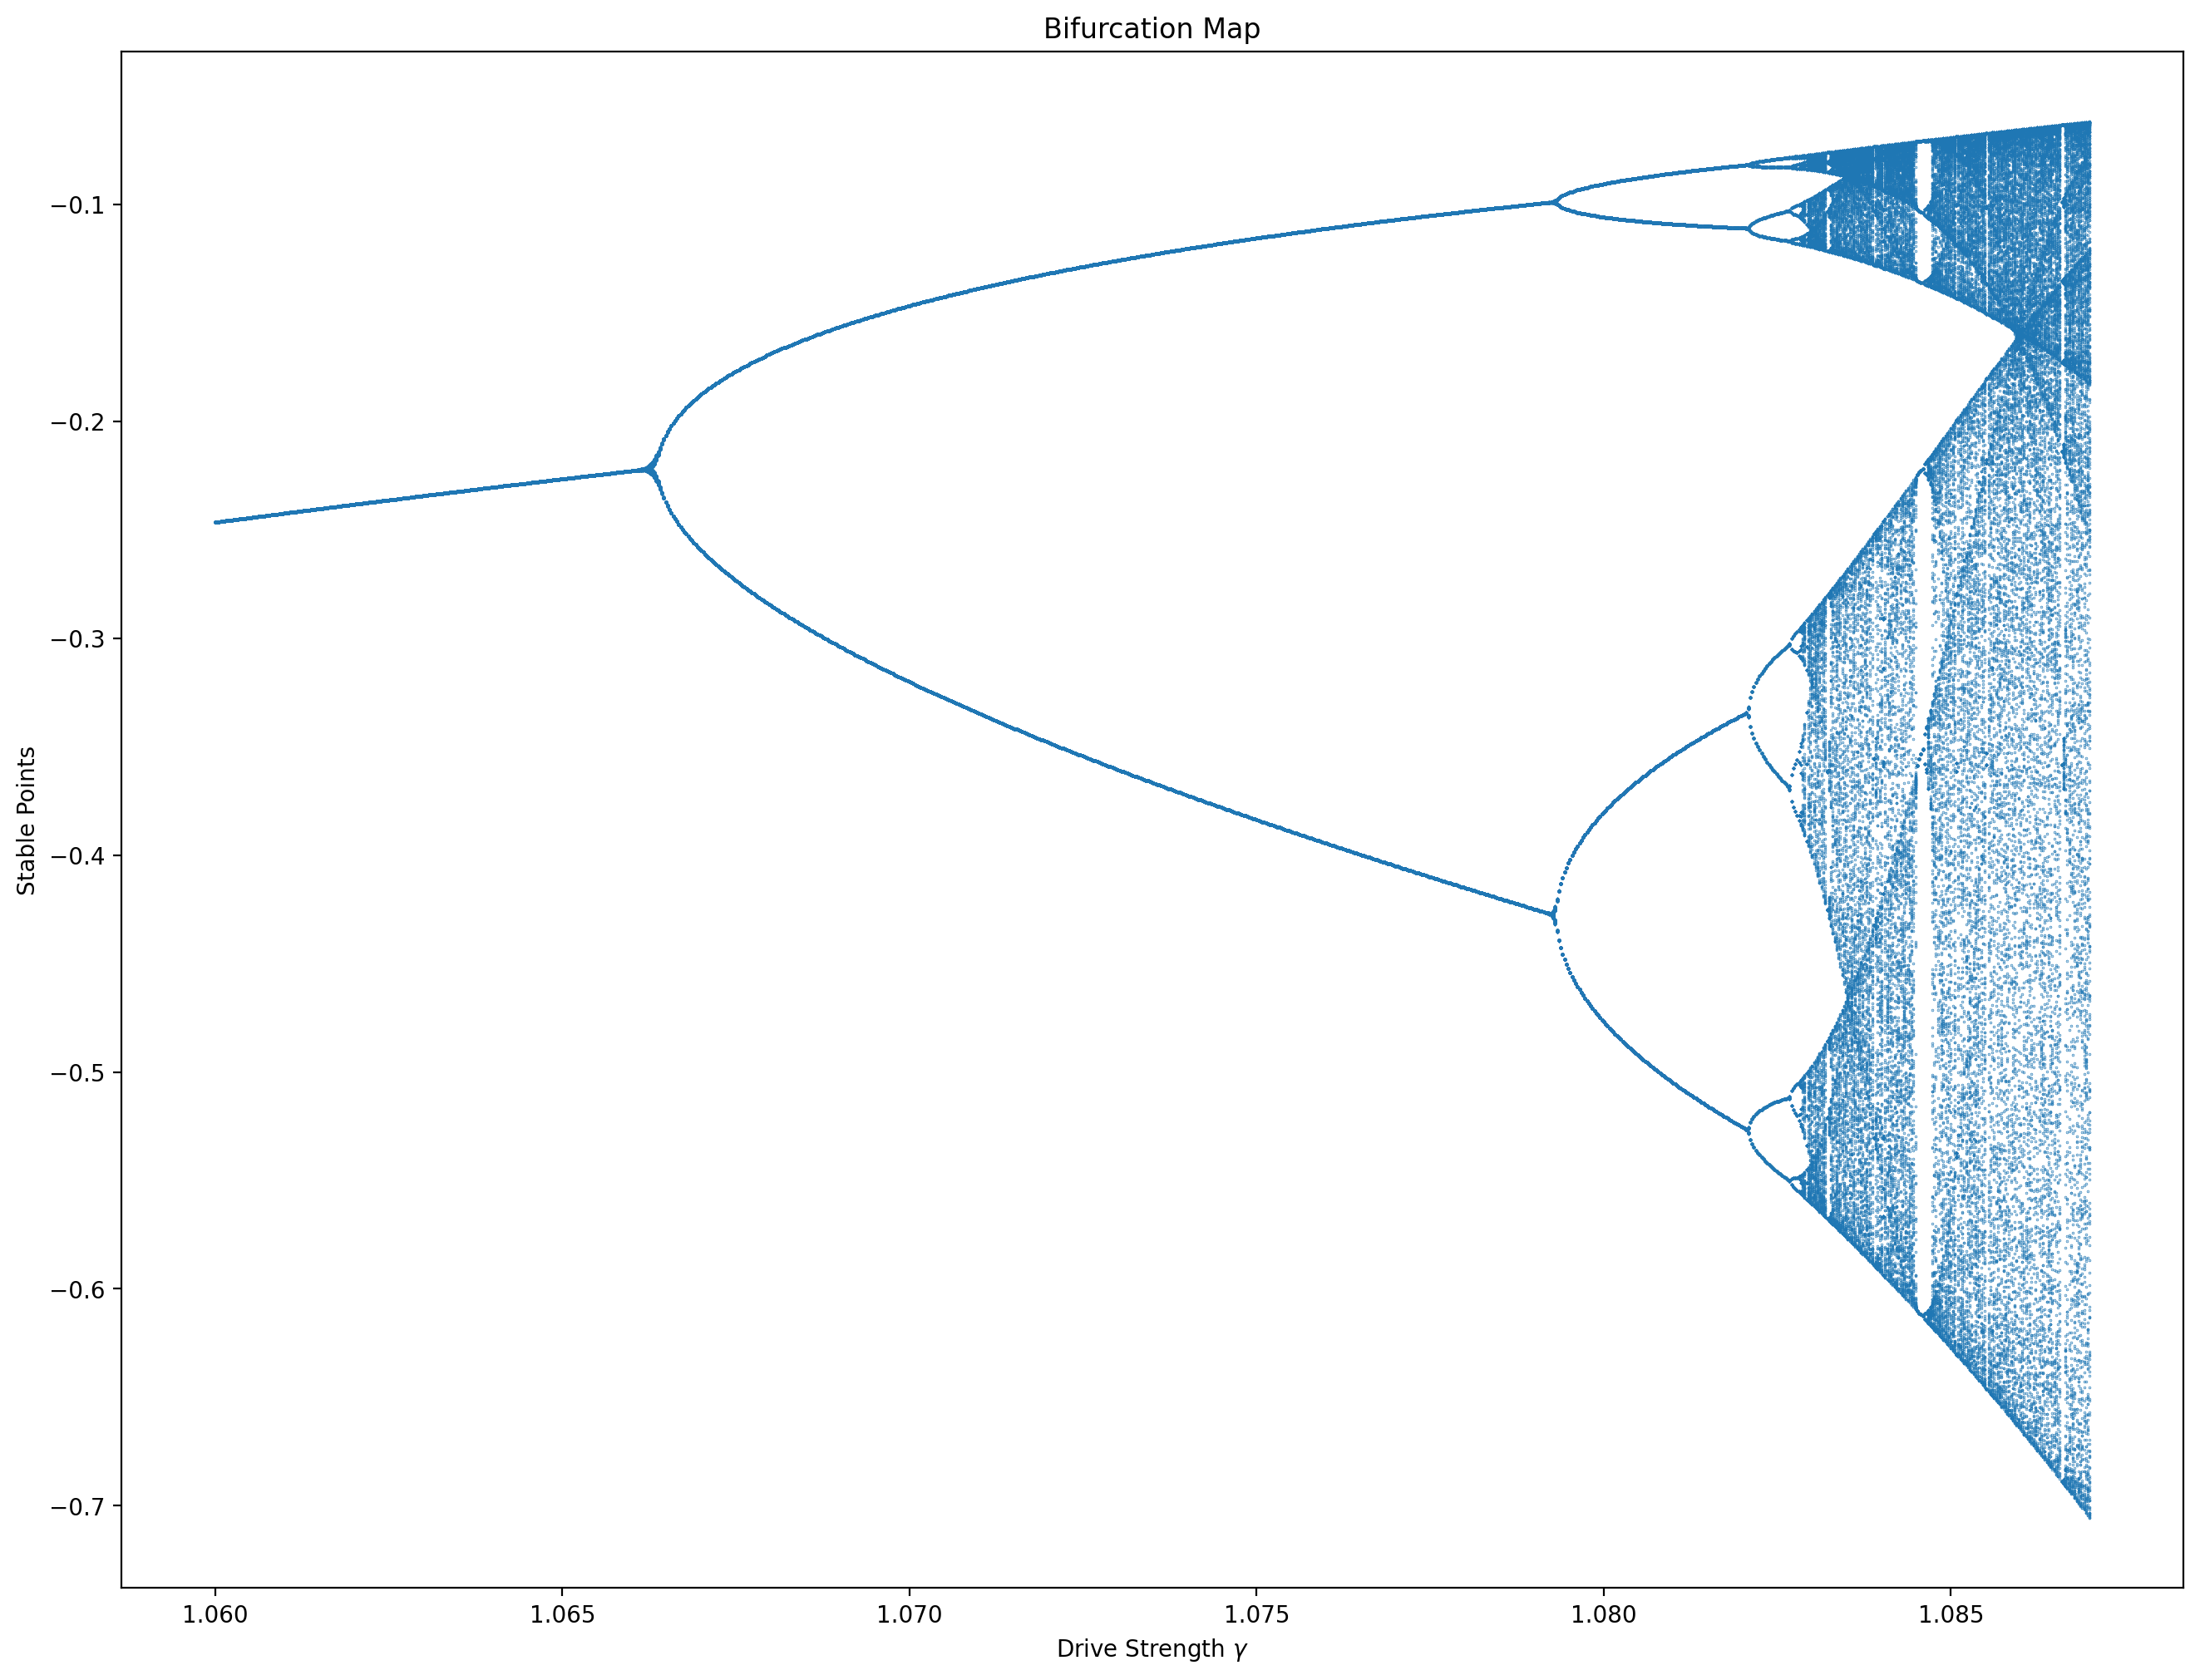

In [6]:
#Plot values
fig, ax = plt.subplots(figsize = (16,12), dpi=200)

ax.scatter(gamma_matrix,bifurcation_pts, s=0.05)
ax.set_xlabel('Drive Strength $\gamma$')
ax.set_ylabel('Stable Points')
ax.set_title('Bifurcation Map')

# Bifurcation Map - Zoom in

In [19]:
t_start = 0
t_end = 10000
t_eval = np.linspace(t_start,t_end,10001)


gamma_list = np.linspace(1.082,1.087,1000)
length_gamma_list = len(gamma_list)
length_bifurcation_pts = len(t_eval[500:])

phi0 = -np.pi/2        # Initial theta
phi_dot0 = 0    # Initial angular velocity
state0 = np.array([phi0,phi_dot0])
omega = 2*np.pi     # Driving frequency
omega0 =  1.5*omega      # Natural frequency
beta = omega0/4         # Damping parameter



#initialize gamma_matrix and birfurcation pts
gamma_matrix_high_res = np.ones(shape=(length_gamma_list,length_bifurcation_pts))
bifurcation_pts_high_res = np.zeros(shape=(length_gamma_list,length_bifurcation_pts))

for index in np.arange(length_gamma_list):
    gamma_matrix_high_res[index] = gamma_list[index]*gamma_matrix_high_res[index]

for index in np.arange(length_gamma_list):
    sol = integrate.solve_ivp(eom_dpp,t_span = (t_start,t_end), y0=state0, 
                          t_eval=t_eval,atol=1e-16, rtol=1e-16,args=(beta,gamma_list[index],omega0,omega))

    phi = sol.y[0]
    
    bifurcation_pts_high_res[index] = phi[500:]

# With Bifurcation points solved for, save the values to a file so we don't have to calculate them again
np.save('bifurcation_pts_high_res',bifurcation_pts_high_res)
np.save('bifurcation_gammas_high_res',gamma_matrix_high_res)



In [20]:
#Load bifurcation and gamma values
bifurcation_pts_high_res = np.load('bifurcation_pts_high_res.npy')
gamma_matrix_high_res = np.load('bifurcation_gammas_high_res.npy')

Text(0.5, 1.0, 'Bifurcation Map')

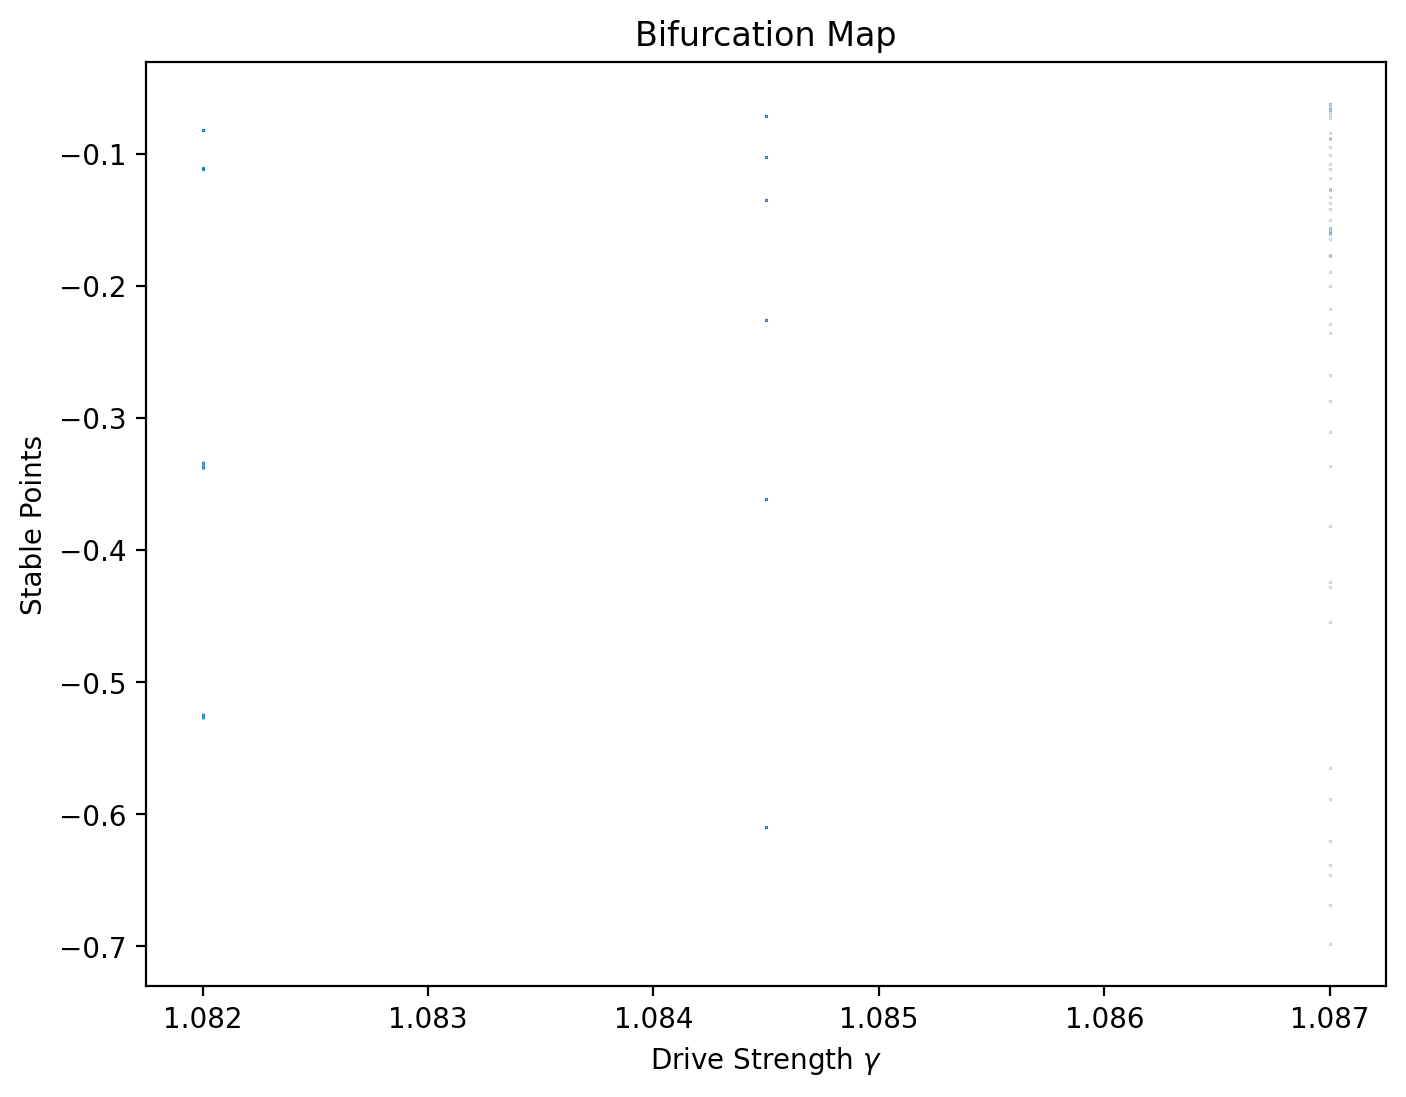

In [21]:
#Plot values
fig, ax = plt.subplots(figsize = (8,6), dpi=200)

ax.scatter(gamma_matrix_high_res,bifurcation_pts_high_res, s=0.01)
ax.set_xlabel('Drive Strength $\gamma$')
ax.set_ylabel('Stable Points')
#ax.set_xlim(1.082,1.087)
ax.set_title('Bifurcation Map - High Res')

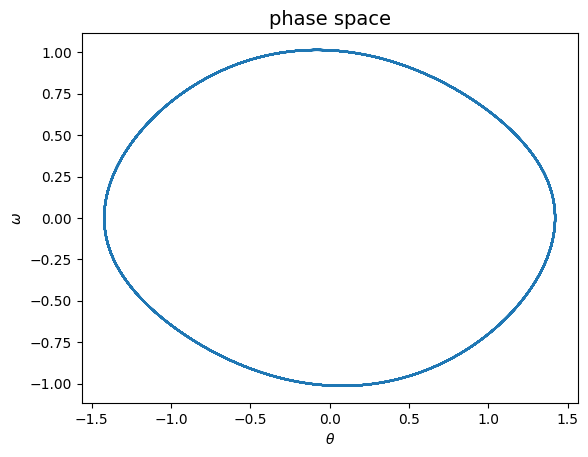

In [19]:
plt.figure(4)
plt.xlabel("$\\theta$")
plt.ylabel("$\omega$")
plt.title("phase space",fontsize=14)
tplot = 5000
plt.plot(th[tplot:],om[tplot:]);

In [10]:
th0 = 0.1       # Initial theta
om0 = 0         # Initial angular velocity
u0 = np.array([th0,om0])# Combine initial conditions in array
b = 0.5         # Damping parameter
g = 1.105        # Driving amplitude
om_d = 2./3     # Driving frequency
t_d = 2*np.pi/om_d

t = np.linspace(14,1000*t_d, 10001)      # NOTE: The  points selected 
                                       # for plotting are not the 
                                       # points used for the numerical evalution.
th, om = integrate.odeint(eqs,u0,t,args=(b,g,om_d)).T

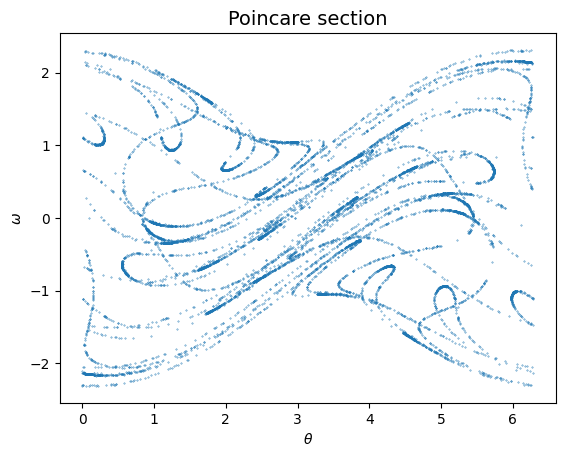

In [11]:
plt.figure(5)
plt.xlabel("$\\theta$")
plt.ylabel("$\omega$")
plt.title("Poincare section",fontsize=14)
plt.scatter(th%(2*np.pi),om,s=0.1);